In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [1]:
from read_and_clean import read_and_clean

In [3]:
orders_df = read_and_clean()

In [4]:
scaler = StandardScaler()
features = scaler.fit_transform(orders_df[['Sales', 'Quantity ordered new', 'Discount', 'Profit']])

kmeans = KMeans(n_clusters=4, random_state=42)
orders_df['Segment'] = kmeans.fit_predict(features)

In [ ]:
orders_df['Segment'] 

0       1
1       2
2       0
3       0
4       0
       ..
1947    1
1948    0
1949    0
1950    0
1951    0
Name: Segment, Length: 1952, dtype: int32

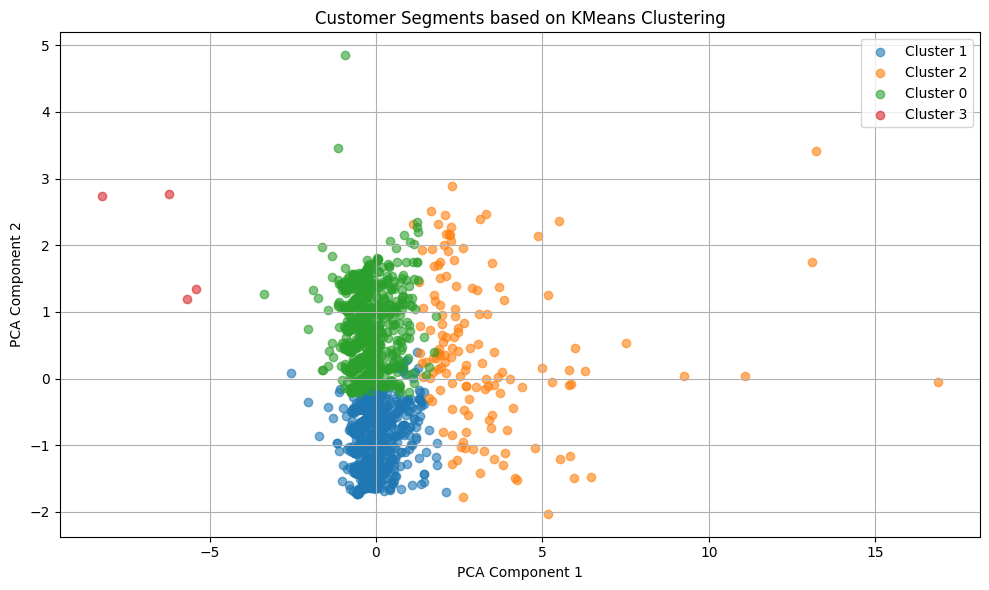

In [ ]:

# Reduce dimensions for visualization using only numeric features used for clustering
pca = PCA(n_components=2)
reduced = pca.fit_transform(features)
orders_df['PCA1'] = reduced[:, 0]
orders_df['PCA2'] = reduced[:, 1]



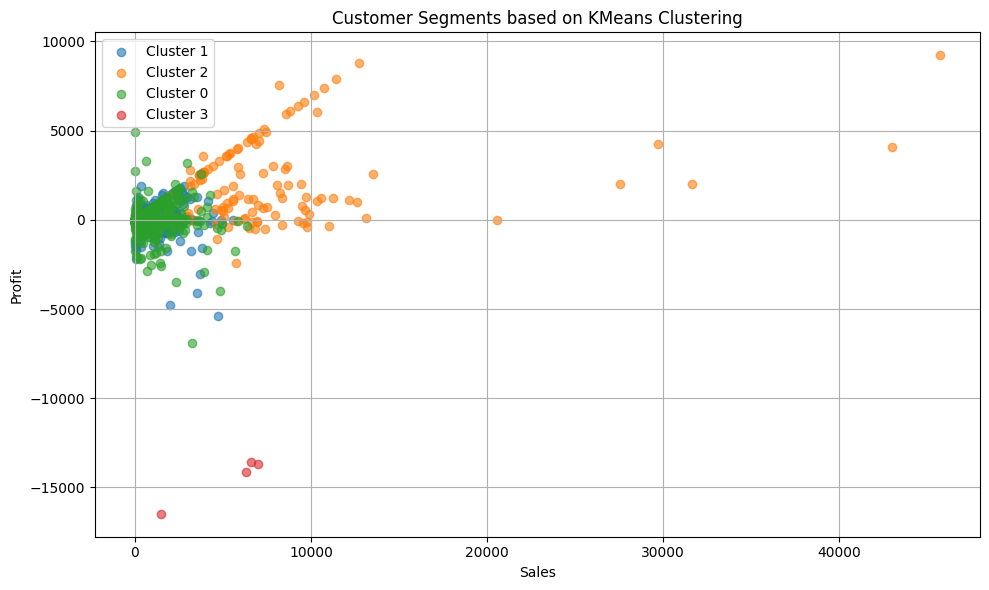

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
for cluster in orders_df['Segment'].unique():
    subset = orders_df[orders_df['Segment'] == cluster]
    plt.scatter(subset['Sales'], subset['Profit'], label=f'Cluster {cluster}', alpha=0.6)

plt.title('Customer Segments based on KMeans Clustering')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Prepare data for basket analysis
orders_subset = orders_df[['Order ID', 'Product Name']].dropna()
basket = orders_subset.groupby('Order ID')['Product Name'].apply(list)

# Encode transactions to one-hot format
te = TransactionEncoder()
te_ary = te.fit_transform(basket)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets
frequent_itemsets = apriori(df_encoded, min_support=0.005, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=1.2)

# Show results
rules_sorted = rules.sort_values(by='lift', ascending=False)
rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)

In [ ]:
rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10)